In [1]:
from chinese_checkers.simulation.SimulationData import SimulationData
from chinese_checkers.simulation.SimulationMetadata import SimulationMetadata
from chinese_checkers.simulation.GameSimulationAnimation import GameSimulationAnimation
from src.chinese_checkers.game.ChineseCheckersGame import ChineseCheckersGame
from src.chinese_checkers.geometry.Printer import Printer
from src.chinese_checkers.simulation.GameSimulation import GameSimulation
from src.chinese_checkers.model.BootstrapModel import BootstrapModel
from src.chinese_checkers.simulation.GameSimulationCatalog import GameSimulationCatalog

---

### Sample target positions

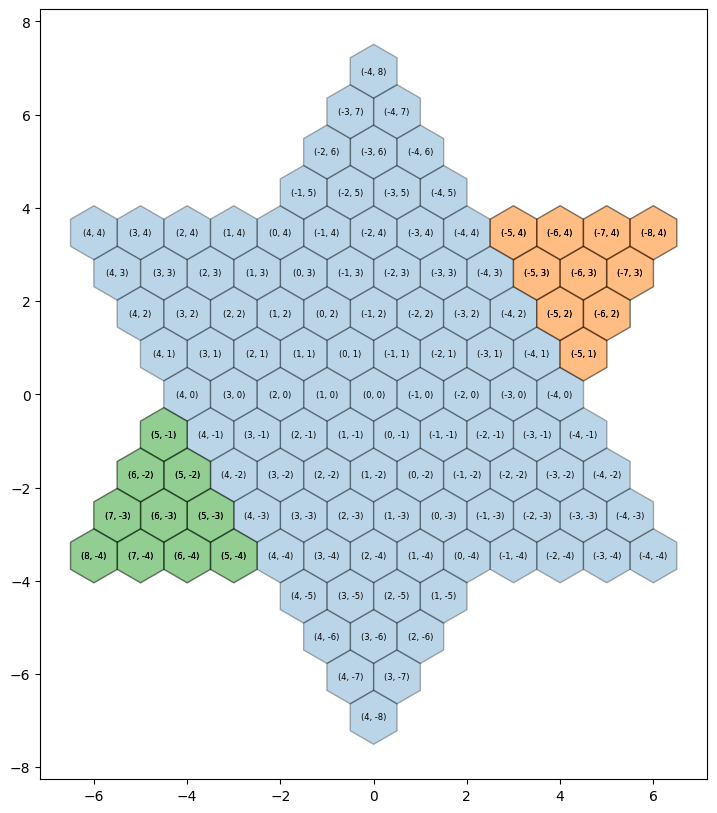

In [2]:
# set up the game
printer = Printer(plot_size=10, show_coordinates=True)
game = ChineseCheckersGame.start_game(3)

printer.print(
    game.board.hexagram_points,
    game.players[1].positions,
    game.players[1].target_positions
)

---
### Simulate a game between two centroid models

In [3]:
model_1 = BootstrapModel()
model_2 = BootstrapModel()
game_simulation = GameSimulation.simulate_game(
    models=[model_1, model_2],
    name="bootstrap-simulation",
    version="v0.0.1",
    print_period=40,
    show_coordinates=True
)
game_metadata: SimulationMetadata = game_simulation.metadata
game_data: SimulationData = game_simulation.data

Creating Animation:   0%|          | 0/29 [00:00<?, ?it/s]


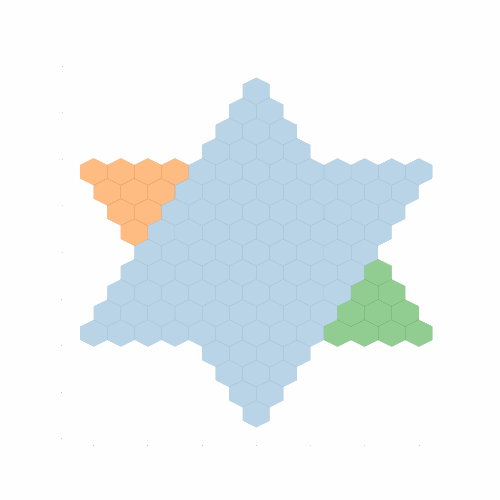

In [4]:
game_simulation.display()

In [5]:
game_simulation.save_animation()

Creating Animation:   0%|          | 0/29 [00:00<?, ?it/s]


---
### Generate a Training Data from the Bootstrap Model

In [6]:
catalog = GameSimulationCatalog("D:/chinese_checkers_games")

In [7]:
for game_number in range(10):
    try:
        game_simulation = GameSimulation.simulate_game(
            models=[model_1, model_2],
            name="bootstrap-simulation",
            version="v0.0.1",
            print_period=40,
            show_coordinates=True
        )
        game_metadata: SimulationMetadata = game_simulation.metadata
        game_data: SimulationData = game_simulation.data

        winner_id = game_metadata.winning_player
        print(f"Game Number {game_number}, Winner {winner_id}")

        catalog.save_simulation(game_simulation)

    except Exception as e:
        print(f"Game Number {game_number} not completed due to error: {e}")

Game Number 0 not completed due to error: No viable move found
Game Number 1 not completed due to error: No viable move found
Game Number 2, Winner None
Game Number 3, Winner None
Game Number 4, Winner None
Game Number 5, Winner None
Game Number 6, Winner None
Game Number 7 not completed due to error: No viable move found
Game Number 8, Winner None
Game Number 9, Winner None


Metadata SimulationMetadata(player_count=2, board_size=4, max_game_length=1000, winning_player='None', name='bootstrap-simulation', version='v0.0.1'), Simulation Count 23


Creating Animation:   0%|          | 0/35 [00:00<?, ?it/s]


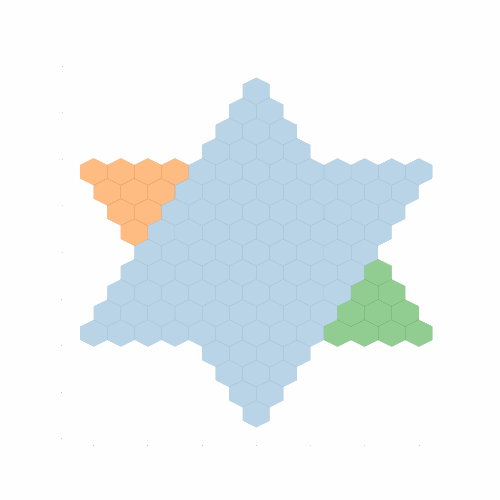

In [8]:
metadata_list = catalog.list_available_metadata()

for metadata in metadata_list:
    simulations = list(catalog.load_simulations_by_metadata(metadata))
    print(f"Metadata {metadata}, Simulation Count {len(simulations)}")
    
    display(simulations[4].display(sample_period=10))